# Year-on-year foreign visitor evolution, France

##### Hassan Burke, November 2023
##### Github: https://github.com/hbburke

In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
%matplotlib inline

In [513]:
tourists = pd.read_csv('valeurs_mensuelles.csv', sep=';')
tourists.head(10)

,Libellé,Nuitées dans l'hôtellerie - Non-résidents - Départements d'outre-mer,Codes,Nuitées dans l'hôtellerie - Non-résidents - Île-de-France,Codes.1,Nuitées dans l'hôtellerie - Non-résidents - Centre-Val de Loire,Codes.2,Nuitées dans l'hôtellerie - Non-résidents - Normandie,Codes.3,Nuitées dans l'hôtellerie - Non-résidents - Hauts-de-France,...,Nuitées dans l'hôtellerie - Non-résidents - Nouvelle-Aquitaine,Codes.8,Nuitées dans l'hôtellerie - Non-résidents - Occitanie,Codes.9,Nuitées dans l'hôtellerie - Non-résidents - Auvergne-Rhône-Alpes,Codes.10,Nuitées dans l'hôtellerie - Non-résidents - Provence-Alpes-Côte d'Azur,Codes.11,Nuitées dans l'hôtellerie - Non-résidents - Corse,Codes.12
0,idBank,010599694,NaN,010598561,NaN,010598559,NaN,010598626,NaN,010598632,...,010598643,NaN,010598649,NaN,010598655,NaN,010598563,NaN,010598560,NaN
1,Dernière mise à jour,12/10/2023 09:55,NaN,12/10/2023 09:55,NaN,12/10/2023 09:55,NaN,12/10/2023 09:55,NaN,12/10/2023 09:55,...,12/10/2023 09:55,NaN,12/10/2023 09:55,NaN,12/10/2023 09:55,NaN,12/10/2023 09:55,NaN,12/10/2023 09:55,NaN
2,Période,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-08,32.18,P,3929,P,205,P,350,P,269,...,506,P,530,P,712,P,1326,P,186.7,P
4,2023-07,43.91,A,4089,A,205,A,307,A,260,...,469,A,536,A,742,A,1334,A,171.5,A
5,2023-06,34.58,A,3910,A,150,A,244,A,209,...,306,A,382,A,531,A,1068,A,120.2,A
6,2023-05,39.49,A,3652,A,119,A,202,A,196,...,253,A,390,A,378,A,829,A,81.9,A
7,2023-04,55.91,A,3715,A,88,A,150,A,185,...,221,A,313,A,458,A,694,A,30.0,A
8,2023-03,56.69,A,2938,A,44,A,76,A,123,...,123,A,124,A,655,A,391,A,4.1,A
9,2023-02,51.56,A,2419,A,32,A,53,A,103,...,86,A,115,A,646,A,244,A,2.5,A


In [514]:
columns_to_drop = tourists.filter(like='Codes').columns
tourists.drop(columns_to_drop, inplace=True, axis=1)
tourists = tourists.iloc[3:]

n_chars = 43
new_cols = {col: col[n_chars:] for col in tourists.columns}
tourists.rename(columns=new_cols, inplace=True)
tourists = tourists.rename(columns={tourists.columns[0]: 'date'})

tourists.head()

,date,Départements d'outre-mer,Île-de-France,Centre-Val de Loire,Normandie,Hauts-de-France,Grand Est,Pays de la Loire,Bretagne,Nouvelle-Aquitaine,Occitanie,Auvergne-Rhône-Alpes,Provence-Alpes-Côte d'Azur,Corse
3,2023-08,32.18,3929,205,350,269,659,129,262,506,530,712,1326,186.7
4,2023-07,43.91,4089,205,307,260,639,123,214,469,536,742,1334,171.5
5,2023-06,34.58,3910,150,244,209,499,99,158,306,382,531,1068,120.2
6,2023-05,39.49,3652,119,202,196,468,72,109,253,390,378,829,81.9
7,2023-04,55.91,3715,88,150,185,450,59,73,221,313,458,694,30.0


In [515]:
aug_23 = tourists.head(1)
aug_23 = aug_23.transpose()
aug_23 = aug_23.iloc[1:]
aug_23 = aug_23.reset_index()
aug_23.columns = ['region','visitors']
aug_23['visitors'] = aug_23['visitors'].astype('float')
aug_23 = aug_23.sort_values('visitors', ascending=False)
aug_23.head()


,region,visitors
1,Île-de-France,3929.0
11,Provence-Alpes-Côte d'Azur,1326.0
10,Auvergne-Rhône-Alpes,712.0
5,Grand Est,659.0
9,Occitanie,530.0


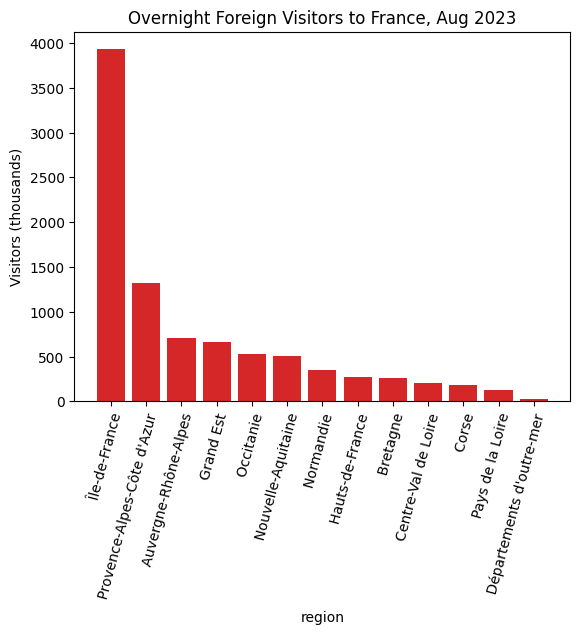

In [516]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = range(13)
labels = aug_23.region
plt.bar(aug_23.region, aug_23.visitors, color = 'tab:red')
plt.xlabel("region")
plt.ylabel("Visitors (thousands)")
plt.title("Overnight Foreign Visitors to France, Aug 2023")
ax.set_xticks(ticks, labels, rotation=75, ha='right', rotation_mode='anchor');


In [517]:
aug_22 = tourists.iloc[12]
aug_22 = aug_22.transpose()
aug_22 = aug_22.iloc[1:]
aug_22 = aug_22.reset_index()
aug_22.columns = ['region','visitors']
aug_22['visitors'] = aug_22['visitors'].astype('float')
aug_22 = aug_22.sort_values('visitors', ascending=False)
aug_22.head()


,region,visitors
1,Île-de-France,3892.0
11,Provence-Alpes-Côte d'Azur,1307.0
5,Grand Est,684.0
10,Auvergne-Rhône-Alpes,663.0
9,Occitanie,503.0


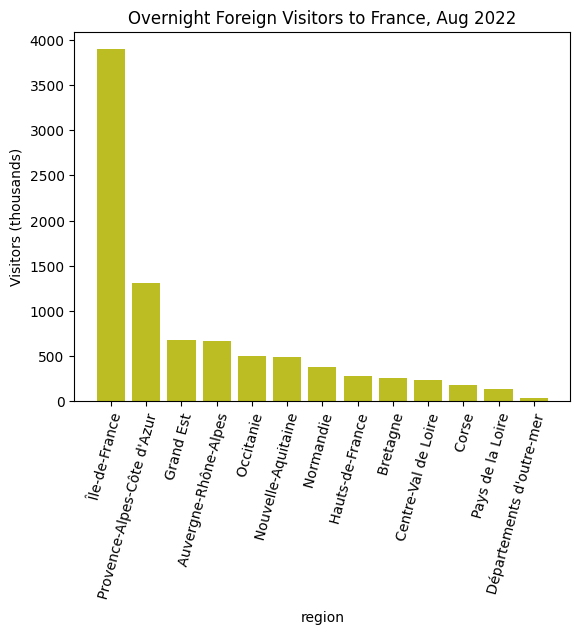

In [518]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = range(13)
labels = aug_22.region
plt.bar(aug_22.region, aug_22.visitors, color = 'tab:olive')
plt.xlabel("region")
plt.ylabel("Visitors (thousands)")
plt.title("Overnight Foreign Visitors to France, Aug 2022")
ax.set_xticks(ticks, labels, rotation=75, ha='right', rotation_mode='anchor');

In [519]:
full_aug = pd.merge(left=aug_22, right=aug_23, how='inner', on='region', suffixes=('_22', '_23'))
full_aug['yoy'] = (((full_aug['visitors_23'] - full_aug['visitors_22'])/ full_aug['visitors_22'])*100).round(1)
full_aug = full_aug.sort_values('yoy', ascending=True)
full_aug.head()

,region,visitors_22,visitors_23,yoy
9,Centre-Val de Loire,234.00,205.00,-12.4
6,Normandie,379.00,350.00,-7.7
12,Départements d'outre-mer,34.52,32.18,-6.8
2,Grand Est,684.00,659.00,-3.7
11,Pays de la Loire,133.00,129.00,-3.0


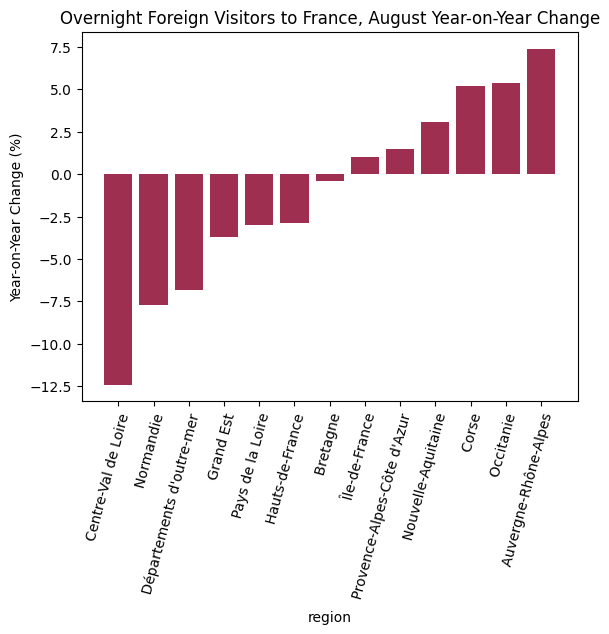

In [520]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = range(13)
labels = full_aug.region
plt.bar(full_aug.region, full_aug.yoy,  color = '#9e2f50')
plt.xlabel("region")
plt.ylabel("Year-on-Year Change (%)")
plt.title("Overnight Foreign Visitors to France, August Year-on-Year Change")
ax.set_xticks(ticks, labels, rotation=75, ha='right', rotation_mode='anchor');

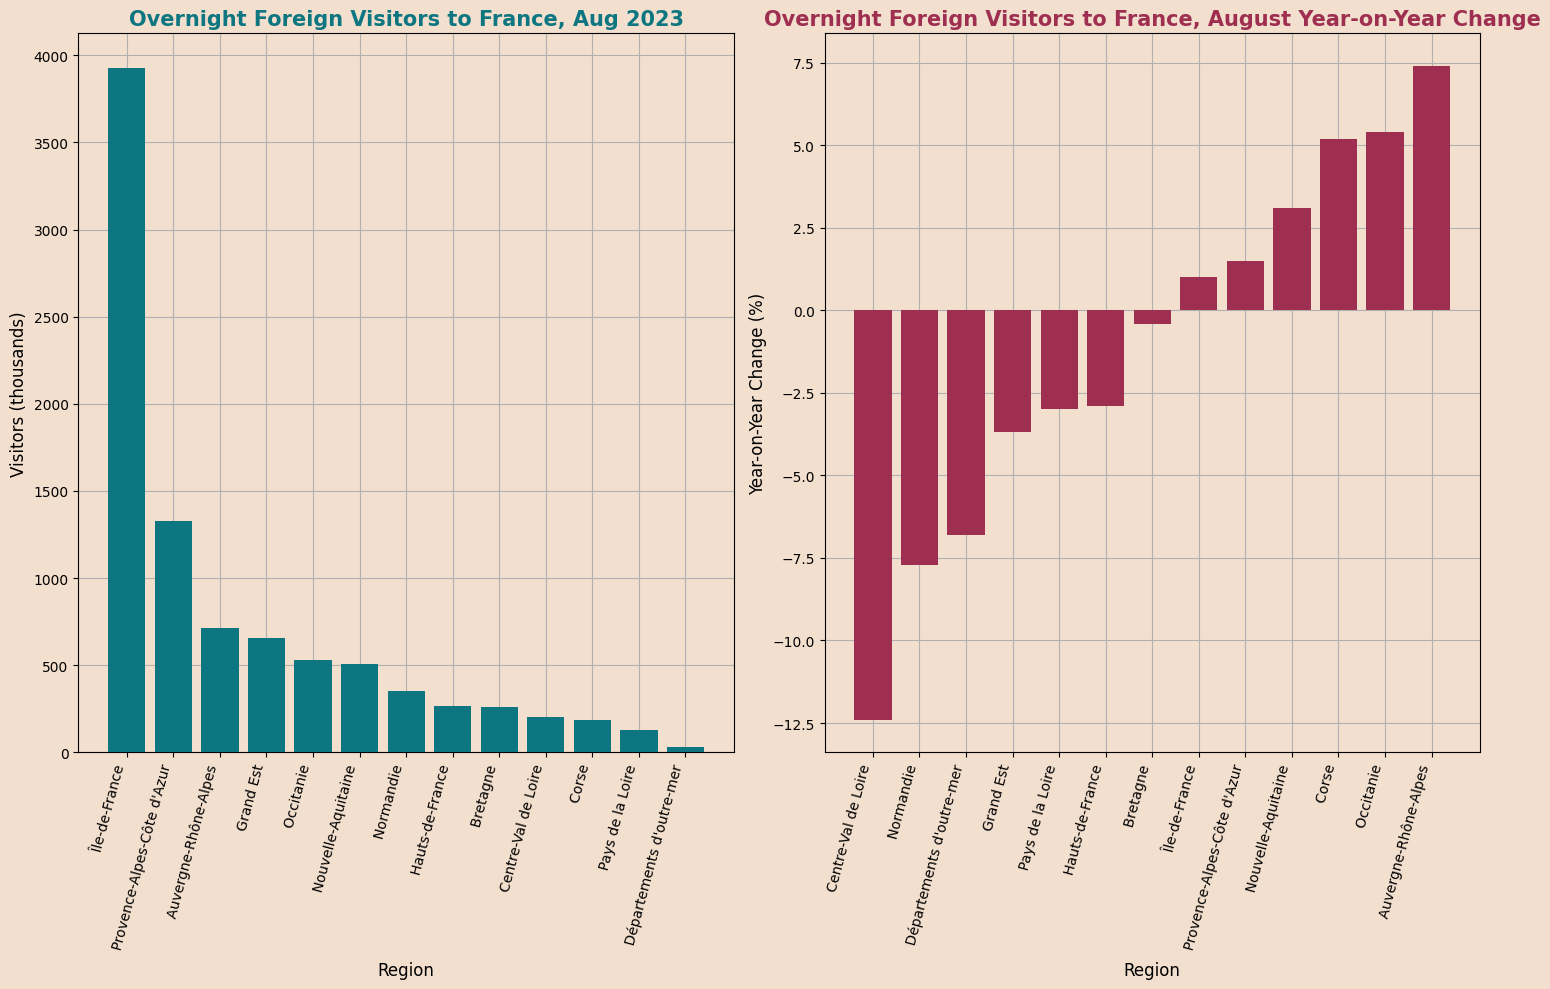

In [521]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.patch.set_facecolor('#F2DFCE')

axes[0].bar(aug_23.region, aug_23.visitors, color='#0D7680',zorder=3)
axes[0].set_xlabel("Region", fontsize=12)
axes[0].set_ylabel("Visitors (thousands)", fontsize=12)
axes[0].set_title("Overnight Foreign Visitors to France, Aug 2023", fontsize=15, color= '#0D7680', fontweight='bold')
axes[0].set_xticks(range(len(aug_23.region)), labels=aug_23.region, rotation=75, ha='right')
axes[0].set_facecolor('#F2DFCE')
axes[0].grid(zorder=0)


axes[1].bar(full_aug.region, full_aug.yoy, color='#9e2f50', zorder=3)
axes[1].set_xlabel("Region", fontsize=12)
axes[1].set_ylabel("Year-on-Year Change (%)", fontsize=12)
axes[1].set_title("Overnight Foreign Visitors to France, August Year-on-Year Change", fontsize=15, color= '#9e2f50', fontweight='bold')
axes[1].set_xticks(range(len(full_aug.region)), labels=full_aug.region, rotation=75, ha='right')
axes[1].set_facecolor('#F2DFCE')
axes[1].grid(zorder=0)

plt.tight_layout()

plt.show()

In [522]:
monthly = pd.read_csv('valeurs_mensuelles.csv', sep=';')

columns_to_drop = monthly.filter(like='Codes').columns
monthly.drop(columns_to_drop, inplace=True, axis=1)
monthly = monthly.iloc[3:]

n_chars = 43
new_cols = {col: col[n_chars:] for col in monthly.columns}
monthly.rename(columns=new_cols, inplace=True)
monthly = monthly.rename(columns={monthly.columns[0]: 'region'})
monthly_transp = monthly.transpose()

monthly_transp.head(14)

,3,4,5,6,7,8,9,10,11,12,...,145,146,147,148,149,150,151,152,153,154
region,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,2022-12,2022-11,...,2011-10,2011-09,2011-08,2011-07,2011-06,2011-05,2011-04,2011-03,2011-02,2011-01
Départements d'outre-mer,32.18,43.91,34.58,39.49,55.91,56.69,51.56,62.37,51.94,47.87,...,35.66,32.22,41.34,29.21,17.04,22.51,46.62,47.4,49.59,53.24
Île-de-France,3929,4089,3910,3652,3715,2938,2419,2630,3235,2670,...,3165,3253,3552,3924,3373,3156,3163,2592,1824,1985
Centre-Val de Loire,205,205,150,119,88,44,32,32,41,40,...,81,145,245,244,149,123,84,38,28,30
Normandie,350,307,244,202,150,76,53,47,55,68,...,127,204,293,266,222,163,137,68,40,31
Hauts-de-France,269,260,209,196,185,123,103,88,129,118,...,156,192,240,260,196,164,166,107,85,67
Grand Est,659,639,499,468,450,254,230,208,446,264,...,348,437,508,490,415,326,334,221,143,144
Pays de la Loire,129,123,99,72,59,39,35,29,31,37,...,38,64,90,86,78,54,42,28,23,22
Bretagne,262,214,158,109,73,41,28,26,28,34,...,59,129,220,183,129,87,66,34,19,16
Nouvelle-Aquitaine,506,469,306,253,221,123,86,88,124,110,...,136,255,371,361,253,182,157,73,42,45


In [523]:
y = monthly_transp.iloc[0]
y = pd.to_datetime(y)
normandie = monthly_transp.iloc[4].astype(float)
bretagne = monthly_transp.iloc[8].astype(float)
paca = monthly_transp.iloc[12].astype(float)
occitanie = monthly_transp.iloc[10].astype(float)
idf = monthly_transp.iloc[2].astype(float)

idf


3      3929.0
4      4089.0
5      3910.0
6      3652.0
7      3715.0
        ...  
150    3156.0
151    3163.0
152    2592.0
153    1824.0
154    1985.0
Name:  Île-de-France, Length: 152, dtype: float64

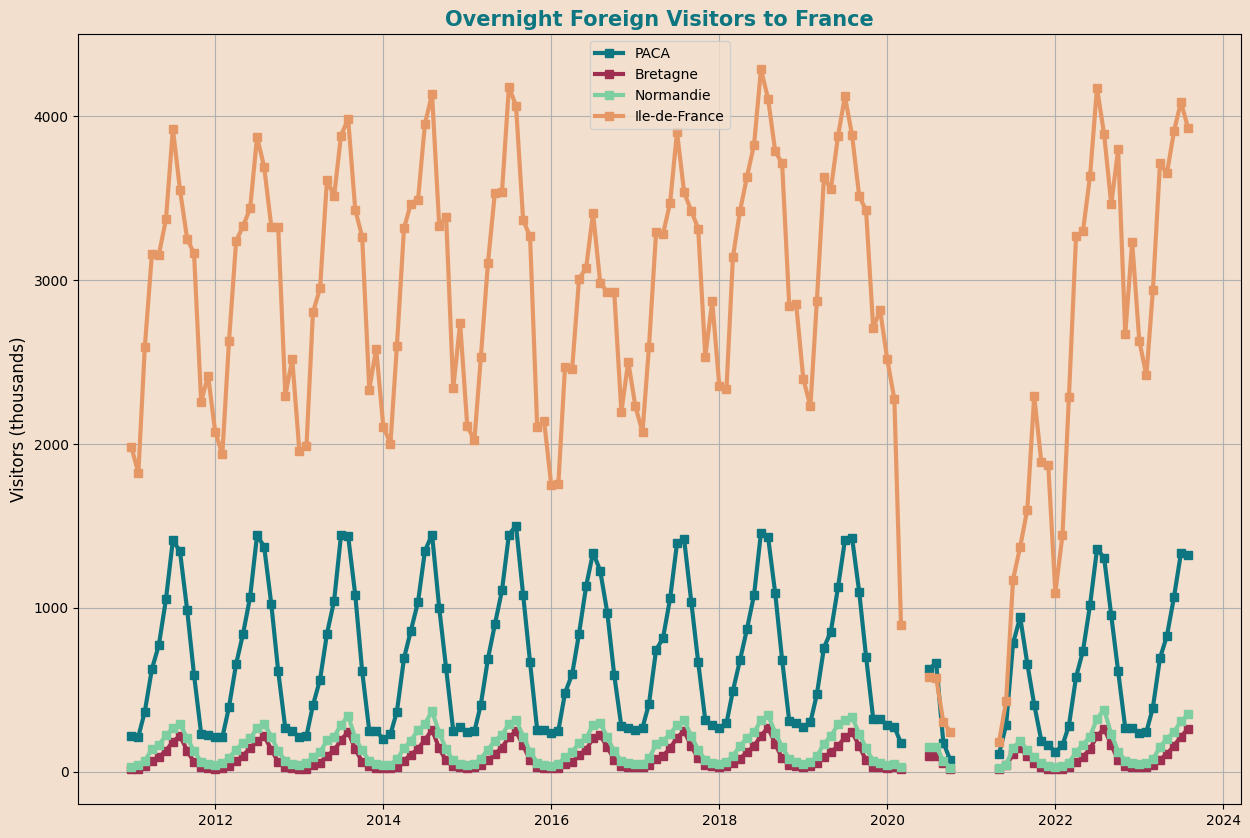

In [524]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('#F2DFCE')
ax = fig.add_subplot(1, 1, 1)

plt.plot(y, paca, "#0D7680", linewidth=3, marker="s", label="PACA")
plt.plot(y, bretagne, "#9e2f50", linewidth=3, marker="s", label="Bretagne")
plt.plot(y, normandie, "#7DCEA0", linewidth=3, marker="s", label="Normandie")
plt.plot(y, idf, "#E59866", linewidth=3, marker="s", label="Ile-de-France")


plt.ylabel("Visitors (thousands)", fontsize=12)
plt.title("Overnight Foreign Visitors to France", fontsize=15, fontweight="bold", color="#0D7680")
plt.grid(True)
plt.legend(loc="best", facecolor="#F2DFCE")
ax.patch.set_facecolor('#F2DFCE')


In [525]:
yearly = pd.read_csv('valeurs_mensuelles.csv', sep=';')

columns_to_drop = yearly.filter(like='Codes').columns
yearly.drop(columns_to_drop, inplace=True, axis=1)
yearly = yearly.iloc[3:]
yearly.rename(columns={'Libellé': 'date'}, inplace=True)

n_chars = 43
new_cols = {col: col[n_chars:] for col in yearly.columns[1:]}
yearly.rename(columns=new_cols, inplace=True)

yearly.head(10)

,date,Départements d'outre-mer,Île-de-France,Centre-Val de Loire,Normandie,Hauts-de-France,Grand Est,Pays de la Loire,Bretagne,Nouvelle-Aquitaine,Occitanie,Auvergne-Rhône-Alpes,Provence-Alpes-Côte d'Azur,Corse
3,2023-08,32.18,3929,205,350,269,659,129,262,506,530,712,1326,186.7
4,2023-07,43.91,4089,205,307,260,639,123,214,469,536,742,1334,171.5
5,2023-06,34.58,3910,150,244,209,499,99,158,306,382,531,1068,120.2
6,2023-05,39.49,3652,119,202,196,468,72,109,253,390,378,829,81.9
7,2023-04,55.91,3715,88,150,185,450,59,73,221,313,458,694,30.0
8,2023-03,56.69,2938,44,76,123,254,39,41,123,124,655,391,4.1
9,2023-02,51.56,2419,32,53,103,230,35,28,86,115,646,244,2.5
10,2023-01,62.37,2630,32,47,88,208,29,26,88,103,659,237,2.5
11,2022-12,51.94,3235,41,55,129,446,31,28,124,182,510,270,2.6
12,2022-11,47.87,2670,40,68,118,264,37,34,110,126,201,266,4.3


In [526]:
yearly['date'] = pd.to_datetime(yearly['date'])
yearly['year'] = yearly['date'].dt.year
yearly.set_index(['year', 'date'], inplace=True)

for col in yearly.columns[1:]:
    yearly[col] = pd.to_numeric(yearly[col], errors='coerce')


In [527]:
yearly_grouped = yearly.groupby(['year']).mean(numeric_only=True)
yearly_grouped.reset_index(inplace=True)
yearly_grouped.head()


,year,Île-de-France,Centre-Val de Loire,Normandie,Hauts-de-France,Grand Est,Pays de la Loire,Bretagne,Nouvelle-Aquitaine,Occitanie,Auvergne-Rhône-Alpes,Provence-Alpes-Côte d'Azur,Corse
0,2011,2888.583333,103.083333,138.000000,153.083333,318.916667,47.250000,82.666667,166.000000,329.583333,383.000000,670.750000,64.666667
1,2012,2973.750000,103.500000,142.333333,160.083333,321.916667,50.416667,86.166667,166.416667,319.333333,406.583333,695.833333,64.916667
2,2013,3025.916667,107.083333,149.083333,167.083333,344.250000,52.083333,87.500000,174.500000,305.666667,424.583333,696.500000,68.333333
3,2014,3073.250000,106.416667,158.833333,183.583333,358.500000,52.916667,92.500000,192.666667,309.916667,406.833333,695.083333,68.333333
4,2015,2997.333333,106.833333,147.000000,185.750000,364.333333,57.250000,96.666667,212.916667,315.166667,451.333333,733.416667,66.916667


In [528]:
yearly_transp = yearly_grouped.transpose()
yearly_transp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
year,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000,2022.000000,2023.000
Île-de-France,2888.583333,2973.750000,3025.916667,3073.250000,2997.333333,2623.000000,3044.250000,3359.166667,3253.833333,1054.571429,1352.375,3022.166667,3410.250
Centre-Val de Loire,103.083333,103.500000,107.083333,106.416667,106.833333,98.166667,106.500000,111.916667,107.416667,50.857143,70.125,96.083333,109.375
Normandie,138.000000,142.333333,149.083333,158.833333,147.000000,142.416667,153.166667,166.333333,168.416667,73.857143,87.875,149.583333,178.625
Hauts-de-France,153.083333,160.083333,167.083333,183.583333,185.750000,198.500000,194.250000,209.166667,188.833333,96.428571,97.625,158.333333,179.125


In [529]:
yearly_transp.iloc[0] = yearly_transp.iloc[0].astype('int')

In [530]:
yearly_transp.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12
year,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.0000,2022.000000,2023.000
Île-de-France,2888.583333,2973.750000,3025.916667,3073.250000,2997.333333,2623.000000,3044.250000,3359.166667,3253.833333,1054.571429,1352.3750,3022.166667,3410.250
Centre-Val de Loire,103.083333,103.500000,107.083333,106.416667,106.833333,98.166667,106.500000,111.916667,107.416667,50.857143,70.1250,96.083333,109.375
Normandie,138.000000,142.333333,149.083333,158.833333,147.000000,142.416667,153.166667,166.333333,168.416667,73.857143,87.8750,149.583333,178.625
Hauts-de-France,153.083333,160.083333,167.083333,183.583333,185.750000,198.500000,194.250000,209.166667,188.833333,96.428571,97.6250,158.333333,179.125
Grand Est,318.916667,321.916667,344.250000,358.500000,364.333333,365.750000,388.916667,416.750000,413.666667,200.142857,253.0000,386.916667,425.875
Pays de la Loire,47.250000,50.416667,52.083333,52.916667,57.250000,60.666667,64.333333,70.833333,65.000000,34.000000,45.3750,64.166667,73.125
Bretagne,82.666667,86.166667,87.500000,92.500000,96.666667,92.250000,98.916667,107.500000,101.333333,47.571429,63.0000,94.000000,113.875
Nouvelle-Aquitaine,166.000000,166.416667,174.500000,192.666667,212.916667,216.916667,229.916667,238.083333,232.333333,113.285714,152.1250,215.083333,256.500
Occitanie,329.583333,319.333333,305.666667,309.916667,315.166667,330.250000,346.333333,350.750000,344.916667,121.571429,154.2500,249.500000,311.625


In [531]:
y = yearly_transp.iloc[0].astype('int')

normandie = yearly_transp.iloc[3].astype(float)
bretagne = yearly_transp.iloc[7].astype(float)
paca = yearly_transp.iloc[11].astype(float)
occitanie = yearly_transp.iloc[9].astype(float)
idf = yearly_transp.iloc[1].astype(float)

bretagne

0      82.666667
1      86.166667
2      87.500000
3      92.500000
4      96.666667
5      92.250000
6      98.916667
7     107.500000
8     101.333333
9      47.571429
10     63.000000
11     94.000000
12    113.875000
Name:  Bretagne, dtype: float64

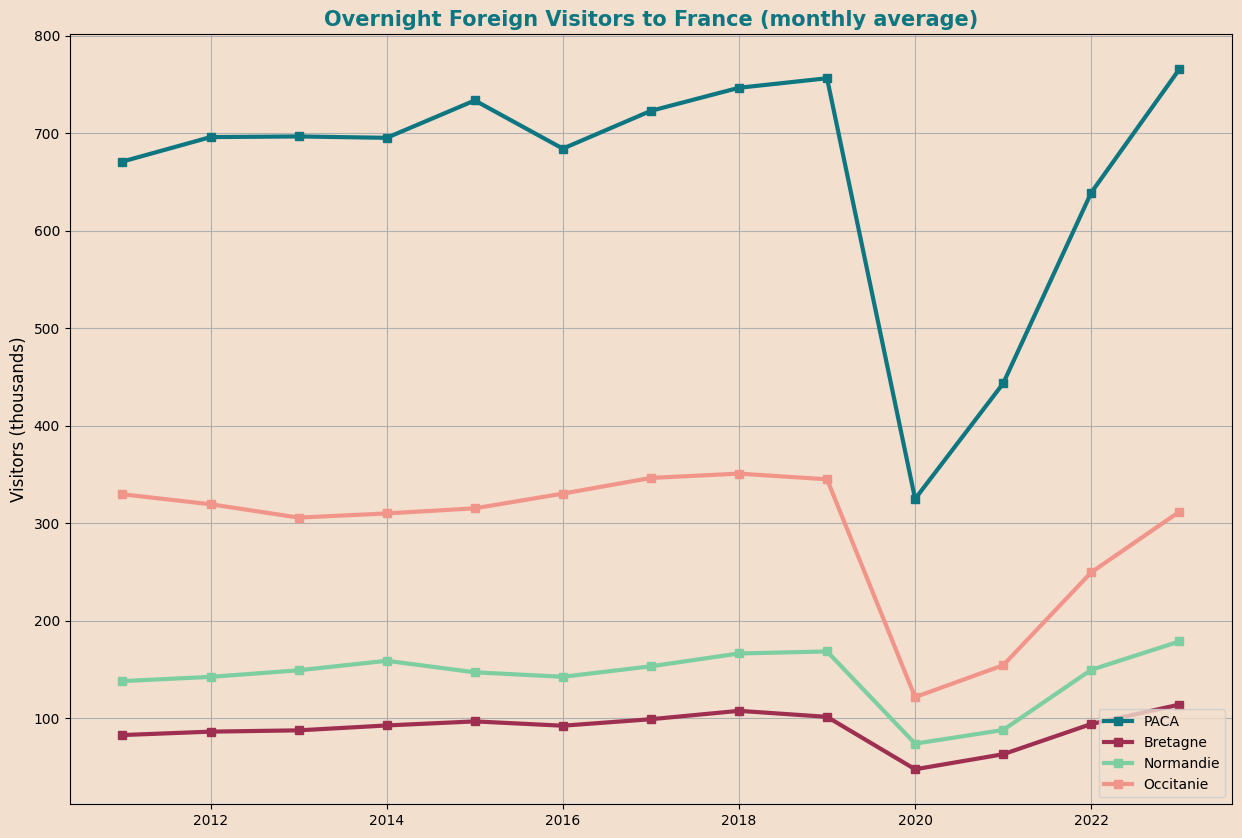

In [532]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('#F2DFCE')
ax = fig.add_subplot(1, 1, 1)

plt.plot(y, paca, "#0D7680", linewidth=3, marker="s", label="PACA")
plt.plot(y, bretagne, "#9e2f50", linewidth=3, marker="s", label="Bretagne")
plt.plot(y, normandie, "#7DCEA0", linewidth=3, marker="s", label="Normandie")
plt.plot(y, occitanie, "#F1948A", linewidth=3, marker="s", label="Occitanie")
#plt.plot(y, idf, "#E59866", linewidth=3, marker="s", label="Ile-de-France")


plt.ylabel("Visitors (thousands)", fontsize=12)
plt.title("Overnight Foreign Visitors to France (monthly average)", fontsize=15, fontweight="bold", color="#0D7680")
plt.grid(True)
plt.legend(loc="lower right", facecolor="#F2DFCE")
ax.patch.set_facecolor('#F2DFCE')

In [533]:
yearly_grouped.set_index('year', inplace=True)
yearly_index = (yearly_grouped / yearly_grouped.iloc[0]) * 100
yearly_index.reset_index(inplace=True)
yearly_index.head()

,year,Île-de-France,Centre-Val de Loire,Normandie,Hauts-de-France,Grand Est,Pays de la Loire,Bretagne,Nouvelle-Aquitaine,Occitanie,Auvergne-Rhône-Alpes,Provence-Alpes-Côte d'Azur,Corse
0,2011,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2012,102.948389,100.404204,103.140097,104.572673,100.940685,106.701940,104.233871,100.251004,96.890013,106.157528,103.739595,100.386598
2,2013,104.754349,103.880356,108.031401,109.145346,107.943559,110.229277,105.846774,105.120482,92.743363,110.857267,103.838986,105.670103
3,2014,106.392984,103.233630,115.096618,119.923789,112.411811,111.992945,111.895161,116.064257,94.032870,106.222802,103.627780,105.670103
4,2015,103.764821,103.637833,106.521739,121.339140,114.240920,121.164021,116.935484,128.263052,95.625790,117.841601,109.342776,103.479381


In [534]:
yearly_ind_transp = yearly_index.transpose()
yearly_ind_transp.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12
year,2011.0,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
Île-de-France,100.0,102.948389,104.754349,106.392984,103.764821,90.805758,105.389032,116.291146,112.644607,36.508257,46.817933,104.624528,118.059602
Centre-Val de Loire,100.0,100.404204,103.880356,103.233630,103.637833,95.230396,103.314470,108.569119,104.203719,49.335951,68.027486,93.209378,106.103476
Normandie,100.0,103.140097,108.031401,115.096618,106.521739,103.200483,110.990338,120.531401,122.041063,53.519669,63.677536,108.393720,129.438406
Hauts-de-France,100.0,104.572673,109.145346,119.923789,121.339140,129.667937,126.891671,136.635819,123.353293,62.990901,63.772455,103.429505,117.011432
Grand Est,100.0,100.940685,107.943559,112.411811,114.240920,114.685132,121.949308,130.676770,129.709956,62.757102,79.331069,121.322184,133.538019
Pays de la Loire,100.0,106.701940,110.229277,111.992945,121.164021,128.395062,136.155203,149.911817,137.566138,71.957672,96.031746,135.802469,154.761905
Bretagne,100.0,104.233871,105.846774,111.895161,116.935484,111.592742,119.657258,130.040323,122.580645,57.546083,76.209677,113.709677,137.752016
Nouvelle-Aquitaine,100.0,100.251004,105.120482,116.064257,128.263052,130.672691,138.504016,143.423695,139.959839,68.244406,91.641566,129.568273,154.518072
Occitanie,100.0,96.890013,92.743363,94.032870,95.625790,100.202276,105.082174,106.422250,104.652339,36.886401,46.801517,75.701643,94.551201


In [535]:
y = yearly_transp.iloc[0].astype('int')

normandie = yearly_ind_transp.iloc[3].astype(float)
bretagne = yearly_ind_transp.iloc[7].astype(float)
paca = yearly_ind_transp.iloc[11].astype(float)
occitanie = yearly_ind_transp.iloc[9].astype(float)
idf = yearly_ind_transp.iloc[1].astype(float)

paca

0     100.000000
1     103.739595
2     103.838986
3     103.627780
4     109.342776
5     101.975401
6     107.752516
7     111.280904
8     112.734501
9      48.431926
10     66.082743
11     95.254069
12    114.107343
Name:  Provence-Alpes-Côte d'Azur, dtype: float64

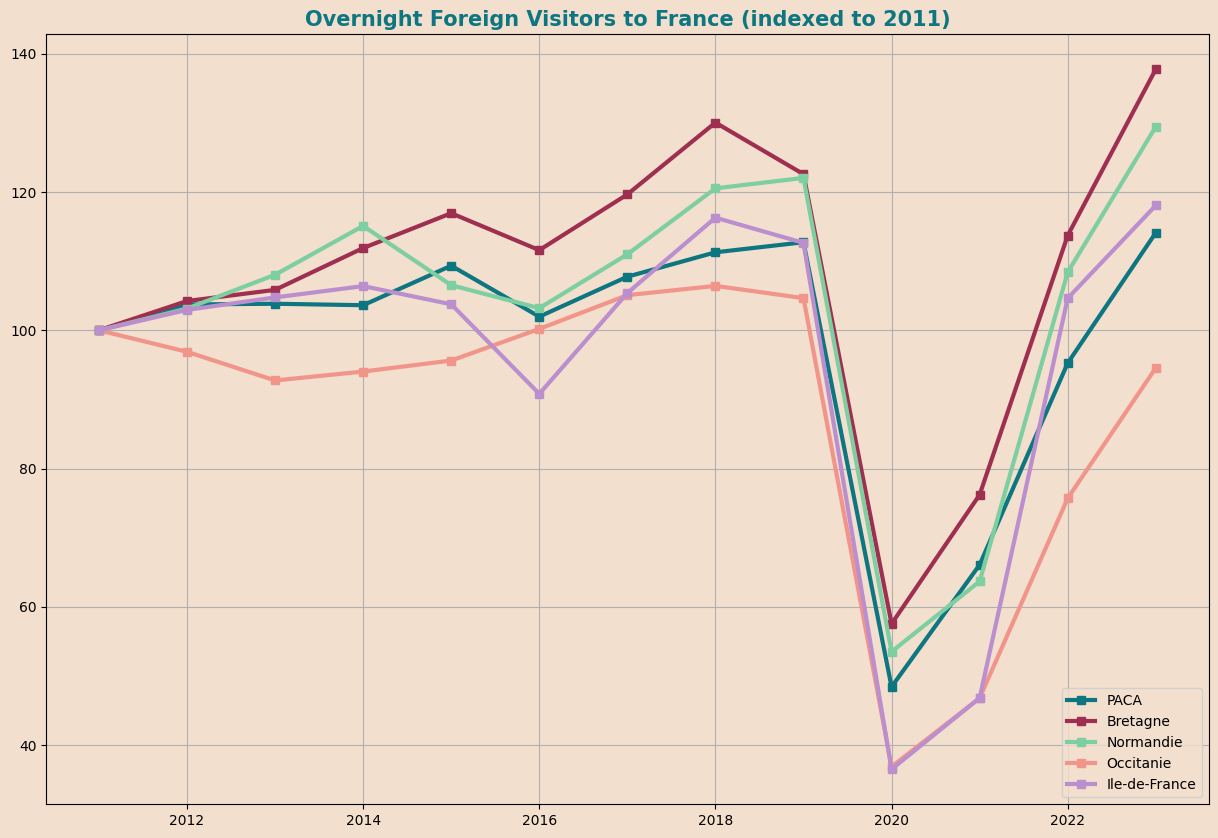

In [536]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('#F2DFCE')
ax = fig.add_subplot(1, 1, 1)

plt.plot(y, paca, "#0D7680", linewidth=3, marker="s", label="PACA")
plt.plot(y, bretagne, "#9e2f50", linewidth=3, marker="s", label="Bretagne")
plt.plot(y, normandie, "#7DCEA0", linewidth=3, marker="s", label="Normandie")
plt.plot(y, occitanie, "#F1948A", linewidth=3, marker="s", label="Occitanie")
plt.plot(y, idf, "#BB8FCE", linewidth=3, marker="s", label="Ile-de-France")


#plt.ylabel("Visitors (thousands)", fontsize=12)
plt.title("Overnight Foreign Visitors to France (indexed to 2011)", fontsize=15, fontweight="bold", color="#0D7680")
plt.grid(True)
plt.legend(loc="lower right", facecolor="#F2DFCE")
ax.patch.set_facecolor('#F2DFCE')

In [537]:
yearly.head()

Départements d'outre-mer   Île-de-France  \
year date                                                   
2023 2023-08-01                     32.18          3929.0   
     2023-07-01                     43.91          4089.0   
     2023-06-01                     34.58          3910.0   
     2023-05-01                     39.49          3652.0   
     2023-04-01                     55.91          3715.0   

                  Centre-Val de Loire   Normandie   Hauts-de-France  \
year date                                                             
2023 2023-08-01                 205.0       350.0             269.0   
     2023-07-01                 205.0       307.0             260.0   
     2023-06-01                 150.0       244.0             209.0   
     2023-05-01                 119.0       202.0             196.0   
     2023-04-01                  88.0       150.0             185.0   

                  Grand Est   Pays de la Loire   Bretagne  \
year date                                                   
2023 2023-08-01       659.0              129.0      262.0   
     2023-07-01       639.0              123.0      214.0   
     2023-06-01       499.0               99.0      158.0   
     2023-05-01       468.0               72.0      109.0   
     2023-04-01       450.0               59.0       73.0   

                  Nouvelle-Aquitaine   Occitanie   Auvergne-Rhône-Alpes  \
year date                                                                 
2023 2023-08-01                506.0       530.0                  712.0   
     2023-07-01                469.0       536.0                  742.0   
     2023-06-01                306.0       382.0                  531.0   
     2023-05-01                253.0       390.0                  378.0   
     2023-04-01                221.0       313.0                  458.0   

                  Provence-Alpes-Côte d'Azur   Corse  
year date                                             
2023 2023-08-01                       1326.0   186.7  
     2023-07-01                       1334.0   171.5  
     2023-06-01                       1068.0   120.2  
     2023-05-01                        829.0    81.9  
     2023-04-01                        694.0    30.0

In [538]:
yearly_jul_aug = yearly[(yearly.index.get_level_values('date').month == 7) | (yearly.index.get_level_values('date').month == 8)]
yearly_jul_aug.head()


Départements d'outre-mer   Île-de-France  \
year date                                                   
2023 2023-08-01                     32.18          3929.0   
     2023-07-01                     43.91          4089.0   
2022 2022-08-01                     34.52          3892.0   
     2022-07-01                     46.78          4175.0   
2021 2021-08-01                     15.25          1373.0   

                  Centre-Val de Loire   Normandie   Hauts-de-France  \
year date                                                             
2023 2023-08-01                 205.0       350.0             269.0   
     2023-07-01                 205.0       307.0             260.0   
2022 2022-08-01                 234.0       379.0             277.0   
     2022-07-01                 225.0       324.0             271.0   
2021 2021-08-01                 144.0       190.0             153.0   

                  Grand Est   Pays de la Loire   Bretagne  \
year date                                                   
2023 2023-08-01       659.0              129.0      262.0   
     2023-07-01       639.0              123.0      214.0   
2022 2022-08-01       684.0              133.0      263.0   
     2022-07-01       654.0              134.0      217.0   
2021 2021-08-01       413.0               86.0      145.0   

                  Nouvelle-Aquitaine   Occitanie   Auvergne-Rhône-Alpes  \
year date                                                                 
2023 2023-08-01                506.0       530.0                  712.0   
     2023-07-01                469.0       536.0                  742.0   
2022 2022-08-01                491.0       503.0                  663.0   
     2022-07-01                461.0       481.0                  716.0   
2021 2021-08-01                301.0       275.0                  431.0   

                  Provence-Alpes-Côte d'Azur   Corse  
year date                                             
2023 2023-08-01                       1326.0   186.7  
     2023-07-01                       1334.0   171.5  
2022 2022-08-01                       1307.0   177.4  
     2022-07-01                       1358.0   161.8  
2021 2021-08-01                        944.0   100.2

In [539]:
yearly_jul_aug_grp = yearly_jul_aug.groupby(['year']).mean(numeric_only=True)
yearly_jul_aug_grp.reset_index(inplace=True)
yearly_jul_aug_grp.head()

,year,Île-de-France,Centre-Val de Loire,Normandie,Hauts-de-France,Grand Est,Pays de la Loire,Bretagne,Nouvelle-Aquitaine,Occitanie,Auvergne-Rhône-Alpes,Provence-Alpes-Côte d'Azur,Corse
0,2011,3738.0,244.5,279.5,250.0,499.0,88.0,201.5,366.0,659.0,554.0,1379.0,171.0
1,2012,3783.5,221.0,279.0,250.5,507.0,97.5,202.0,358.0,617.0,544.0,1408.5,166.0
2,2013,3935.0,236.0,313.5,273.5,563.0,102.5,218.5,394.0,605.0,601.0,1441.0,189.0
3,2014,4045.5,237.5,331.0,298.0,580.5,103.0,225.5,440.5,627.0,549.5,1398.0,181.5
4,2015,4122.5,237.0,305.0,293.0,588.0,107.0,229.0,487.0,602.5,662.5,1474.5,183.0


In [540]:
yearly_jul_aug_grp.set_index('year', inplace=True)
jul_aug_index = (yearly_jul_aug_grp / yearly_jul_aug_grp.iloc[0]) * 100
jul_aug_index.reset_index(inplace=True)
jul_aug_index.head()

,year,Île-de-France,Centre-Val de Loire,Normandie,Hauts-de-France,Grand Est,Pays de la Loire,Bretagne,Nouvelle-Aquitaine,Occitanie,Auvergne-Rhône-Alpes,Provence-Alpes-Côte d'Azur,Corse
0,2011,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2012,101.217228,90.388548,99.821109,100.2,101.603206,110.795455,100.248139,97.814208,93.626707,98.194946,102.139231,97.076023
2,2013,105.270198,96.523517,112.164580,109.4,112.825651,116.477273,108.436725,107.650273,91.805766,108.483755,104.496012,110.526316
3,2014,108.226324,97.137014,118.425760,119.2,116.332665,117.045455,111.910670,120.355191,95.144158,99.187726,101.377810,106.140351
4,2015,110.286249,96.932515,109.123435,117.2,117.835671,121.590909,113.647643,133.060109,91.426404,119.584838,106.925308,107.017544


In [541]:
jul_aug_ind_transp = jul_aug_index.transpose()
jul_aug_ind_transp.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12
year,2011.0,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
Île-de-France,100.0,101.217228,105.270198,108.226324,110.286249,85.553772,99.545211,112.306046,107.142857,15.355805,34.055645,107.905297,107.249866
Centre-Val de Loire,100.0,90.388548,96.523517,97.137014,96.932515,88.343558,93.865031,94.887526,89.366053,43.762781,56.646217,93.865031,83.844581
Normandie,100.0,99.821109,112.164580,118.425760,109.123435,104.472272,106.797853,117.531306,116.100179,54.203936,59.749553,125.760286,117.531306
Hauts-de-France,100.0,100.200000,109.400000,119.200000,117.200000,117.800000,115.600000,125.000000,110.000000,60.400000,56.000000,109.600000,105.800000
Grand Est,100.0,101.603206,112.825651,116.332665,117.835671,115.030060,121.943888,126.452906,127.354709,65.430862,75.751503,134.068136,130.060120
Pays de la Loire,100.0,110.795455,116.477273,117.045455,121.590909,127.272727,127.272727,142.045455,133.522727,60.227273,89.772727,151.704545,143.181818
Bretagne,100.0,100.248139,108.436725,111.910670,113.647643,106.451613,113.399504,121.339950,111.910670,47.642680,62.531017,119.106700,118.114144
Nouvelle-Aquitaine,100.0,97.814208,107.650273,120.355191,133.060109,131.284153,134.153005,138.387978,131.420765,58.469945,76.229508,130.054645,133.196721
Occitanie,100.0,93.626707,91.805766,95.144158,91.426404,95.447648,98.406677,97.344461,92.564492,26.858877,37.708649,74.658574,80.880121


In [542]:
y = jul_aug_ind_transp.iloc[0].astype('int')

normandie = jul_aug_ind_transp.iloc[3].astype(float)
bretagne = jul_aug_ind_transp.iloc[7].astype(float)
paca = jul_aug_ind_transp.iloc[11].astype(float)
occitanie = jul_aug_ind_transp.iloc[9].astype(float)
idf = jul_aug_ind_transp.iloc[1].astype(float)

paca

0     100.000000
1     102.139231
2     104.496012
3     101.377810
4     106.925308
5      93.002175
6     101.994199
7     104.822335
8     103.045685
9      46.809282
10     62.617839
11     96.627991
12     96.446701
Name:  Provence-Alpes-Côte d'Azur, dtype: float64

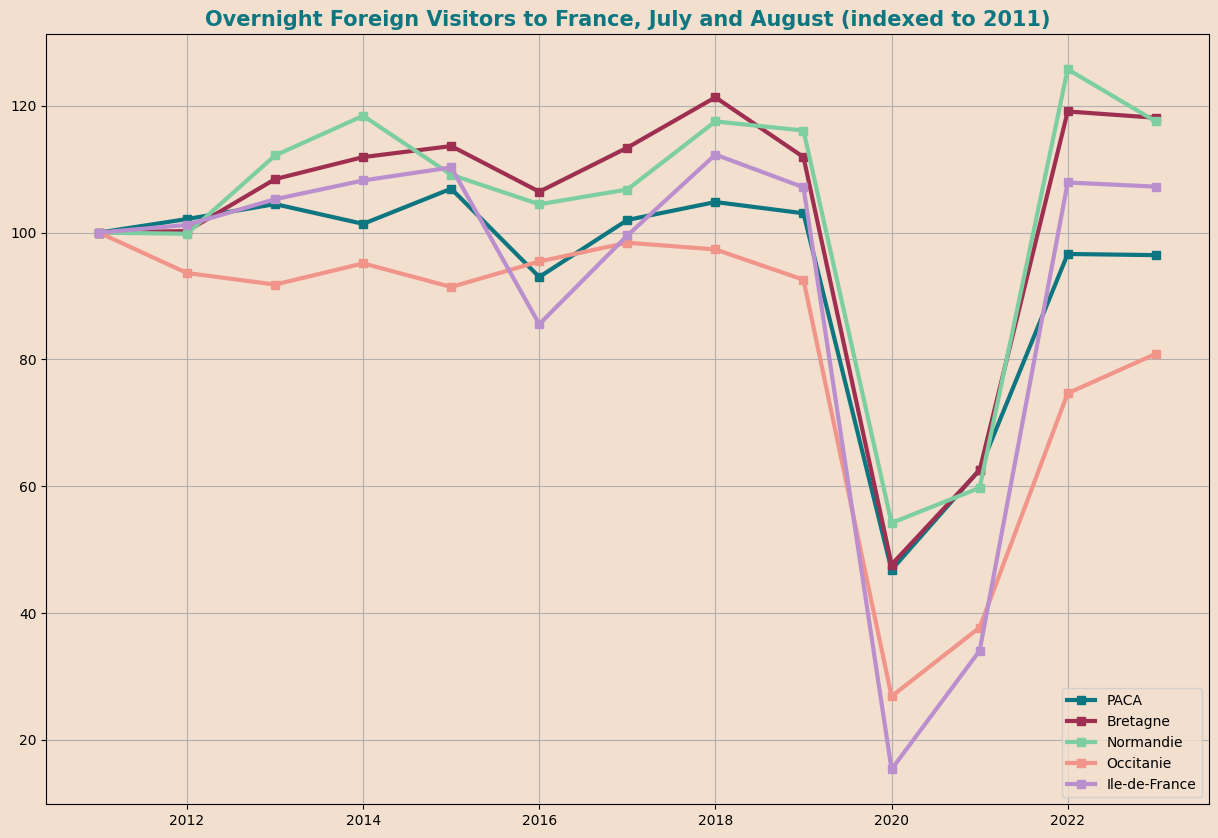

In [543]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('#F2DFCE')
ax = fig.add_subplot(1, 1, 1)

plt.plot(y, paca, "#0D7680", linewidth=3, marker="s", label="PACA")
plt.plot(y, bretagne, "#9e2f50", linewidth=3, marker="s", label="Bretagne")
plt.plot(y, normandie, "#7DCEA0", linewidth=3, marker="s", label="Normandie")
plt.plot(y, occitanie, "#F1948A", linewidth=3, marker="s", label="Occitanie")
plt.plot(y, idf, "#BB8FCE", linewidth=3, marker="s", label="Ile-de-France")


#plt.ylabel("Visitors (thousands)", fontsize=12)
plt.title("Overnight Foreign Visitors to France, July and August (indexed to 2011)", fontsize=15, fontweight="bold", color="#0D7680")
plt.grid(True)
plt.legend(loc="lower right", facecolor="#F2DFCE")
ax.patch.set_facecolor('#F2DFCE')

### Domestic visitors

## Part 2: Climate data

### Air temperature

In [545]:
temp_paca = pd.read_csv("airtemp_paca.csv", sep=',')
temp_bret = pd.read_csv("airtemp_bret.csv", sep=',')
temp_bnorm = pd.read_csv("airtemp_bas_norm.csv", sep=',')
temp_hnorm = pd.read_csv("airtemp_haut_norm.csv", sep=',')
temp_ldoc = pd.read_csv("airtemp_languedoc.csv", sep=',')

temp_paca.tail()

,Category,Average Maximum Surface Air Temperature
117,2018,450
118,2019,450
119,2020,450
120,2021,450
121,2022,450


### Precipitation